## Краткий анализ предметной области

### Описание
Анализируется рынок золота — ключевой сегмент мирового финансового рынка. Стоимость золота зависит от макроэкономических показателей, геополитических событий, процентных ставок и спроса/предложения.

### Бизнес-задача
Провести анализ исторических данных о ценах на золото для выявления тенденций и факторов, влияющих на динамику стоимости.

### Основные проблемы
- Высокая волатильность цен
- Многофакторность влияния
- Реакция на мировые события

### Описание данных
**Источник:** Kaggle  
**Объём:** 18,000+ записей  
**Структура:** 7 столбцов (дата, цена, открытие, максимум, минимум, изменение %, валюта)

Данный датасет предоставляет широкие возможности для анализа динамики цен на золото, выявления закономерностей и построения аналитических моделей, что делает его ценным инструментом для финансовых аналитиков и инвесторов.

**Импорт библиотек и установка зависимостей**

In [28]:
#1 промежуточный отчет
import pandas as pd
import numpy as np
#2 промежуточный отчет
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

**Загрузка данных**

In [29]:
# Загрузка данных из файла CSV
file_path = 'gold.csv'
df = pd.read_csv(file_path)

**Описание темы и бизнес-задачи**

Тема: Анализ исторических данных о ценах на золото
Бизнес-задача:
Провести комплексный анализ динамики рынка золота, выявить ключевые тенденции, закономерности и факторы, влияющие на изменение стоимости золота. Сделать выводы, которые могут быть полезны для инвесторов и аналитиков.

**Изучение данных**

*Первичный обзор данных*

In [30]:
# Просмотр первых 5 строк
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [31]:
# Просмотр последних 5 строк
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD
5702,2022-09-02,1707.9,1729.45,1707.05,1723.0,0,USD


In [32]:
# Случайная выборка 5 строк
df.sample(5)

,Date,Open,High,Low,Close,Volume,Currency
390,2001-07-25,270.0,270.2,267.3,267.8,37011,USD
340,2001-05-14,268.3,269.1,267.8,268.7,26093,USD
1379,2005-07-14,424.7,425.1,419.2,420.2,70709,USD
4479,2017-10-24,1283.9,1285.3,1274.8,1278.3,268907,USD
3006,2011-12-19,1603.5,1611.5,1585.5,1596.7,121278,USD


In [33]:
# Атрибуты датафрейма
print('Форма датафрейма:', df.shape)
print('Названия столбцов:', list(df.columns))

Форма датафрейма: (5703, 7)
Названия столбцов: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency']


In [34]:
# Информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


In [35]:
# Использование памяти
df.memory_usage(deep=True)

,0
Index,132
Date,382101
Open,45624
High,45624
Low,45624
Close,45624
Volume,45624
Currency,342180


**Вывод:**

Датасет имеет 5703 записей и 7 столбцов. Названия столбцов:'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'. Столбцы date и currency имеют тип object, их привести к типам datetime и text.

*Описательная статистика и выявление проблем*

In [36]:
# Описательная статистика по числовым столбцам
df.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [37]:
# Описательная статистика по всем столбцам
df.describe(include='all')

,Date,Open,High,Low,Close,Volume,Currency
count,5703,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000,5703
unique,5703,NaN,NaN,NaN,NaN,NaN,1
top,2022-09-02,NaN,NaN,NaN,NaN,NaN,USD
freq,1,NaN,NaN,NaN,NaN,NaN,5703
mean,NaN,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297,NaN
std,NaN,518.733377,522.353946,514.455903,518.524020,102537.449058,NaN
min,NaN,256.600000,259.400000,255.100000,256.600000,0.000000,NaN
25%,NaN,459.850000,463.900000,457.450000,460.500000,52938.500000,NaN
50%,NaN,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000,NaN
75%,NaN,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000,NaN


In [38]:
# Уникальные значения для категориальных столбцов
for col in df.select_dtypes(include='object').columns:
    print(f'{col}:', df[col].unique()[:10])

Date: ['2000-01-04' '2000-01-05' '2000-01-06' '2000-01-07' '2000-01-10'
 '2000-01-11' '2000-01-12' '2000-01-13' '2000-01-14' '2000-01-18']
Currency: ['USD']


**Вывод:**

Данные на золото указаны с 04.01.2000 по 02.09.2022, валюта - доллары США.

*Приведение наименований столбцов и текста к змеиному регистру*

In [39]:
# Приведение названий столбцов к snake_case и нижнему регистру
df.columns = [col.strip().replace(' ', '_').replace('-', '_').lower() for col in df.columns]
print('Новые названия столбцов:', list(df.columns))

# Приведение всех текстовых значений к нижнему регистру
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

Новые названия столбцов: ['date', 'open', 'high', 'low', 'close', 'volume', 'currency']


*Проверка и обработка пропусков*

In [40]:
# Проверка пропусков
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [41]:
# Обработка пропусков
threshold = 0.05 * len(df)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].isnull().sum() <= threshold:
            # Если пропусков <5%, удаляем строки с пропусками
            df = df[df[col].notnull()]
            print(f'Столбец {col}: строки с пропусками удалены (менее 5% от общего числа)')
        elif df[col].dtype in ['float64', 'int64']:
            # Если числовой столбец — заполняем средним значением
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f'Столбец {col}: пропуски заполнены средним значением ({mean_value})')
        else:
            # Для категориальных — заполняем модой
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)
            print(f'Столбец {col}: пропуски заполнены модой ({mode_value})')

**Вывод:**

Столбцы с пропусками отсутствуют.

*Изменение типов данных*

In [42]:
# Преобразование столбца с датой в datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print('Столбец date: преобразован в datetime')

# Преобразование столбца с валютой в строковый тип
if 'currency' in df.columns:
    df['currency'] = df['currency'].astype(str)
    print('Столбец currency: преобразован в строковый тип')

# Обработка остальных столбцов
for col in df.columns:
    if df[col].dtype == 'object' and col not in ['date', 'currency']:
        try:
            # Пробуем преобразовать к float
            df[col] = df[col].astype(float)
            print(f'Столбец {col}: преобразован в float')
        except:
            # Оставляем как есть (категориальный)
            pass
# Объяснения: преобразуем к числовым или датам для корректной работы с данными и анализа

Столбец date: преобразован в datetime
Столбец currency: преобразован в строковый тип


**Вывод:**

Столбец date приведен к типу datetime, currency - к типу text.

*Поиск и удаление дубликатов*

In [43]:
# Поиск дубликатов
dups = df.duplicated()
print(f'Количество дубликатов: {dups.sum()}')
if dups.sum() > 0:
    df = df.drop_duplicates()
    print('Дубликаты удалены.')
else:
    print('Дубликаты отсутствуют.')

Количество дубликатов: 0
Дубликаты отсутствуют.


**Вывод:**

В датафрейме дубликаты отсутствуют.

**Промежуточные выводы**

In [44]:
print(f'Итоговая форма датафрейма: {df.shape}')
print('Типы данных после обработки:')
print(df.dtypes)
print('Количество пропусков после обработки:')
print(df.isnull().sum().sum())

Итоговая форма датафрейма: (5703, 7)
Типы данных после обработки:
date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
currency            object
dtype: object
Количество пропусков после обработки:
0


**Вывод:**

Датасет имеет 5703 записей и 7 столбцов. Названия столбцов:'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'.Данные на золото указаны с 04.01.2000 по 02.09.2022, валюта - доллары США. Столбцы с пропусками отсутствуют. Столбец date приведен к типу datetime, currency - к типу text. В датафрейме дубликаты отсутствуют.

# **Исследовательский анализ данных**

**Индексация по столбцам и логическая индексация**

*1. Индексация по названию столбца (Series)*

*2. Индексация по нескольким столбцам (DataFrame)*

*3. Индексация по срезу строк и столбца*

*4. Индексация по loc (по метке)*

*5. Индексация по iloc (по позиции)*

In [45]:
print('1. Цена закрытия (первые 5):', df['close'].head(), "\n")

print('2. Дата и цена закрытия (первые 5):')
print(df[['date', 'close']].head(), "\n")

print('3. Срез строк 10:20 по столбцу close:')
print(df['close'][10:20], "\n")

if 'date' in df.columns:
    print('4. Индексация по loc (дата и close, строки 0-4):')
    print(df.loc[0:4, ['date', 'close']])
print("\n")

print('5. Индексация по iloc (первые 3 строки, первые 3 столбца):')
print(df.iloc[:3, :3])




1. Цена закрытия (первые 5): 0    283.7
1    282.1
2    282.4
3    282.9
4    282.7
Name: close, dtype: float64 

2. Дата и цена закрытия (первые 5):
        date  close
0 2000-01-04  283.7
1 2000-01-05  282.1
2 2000-01-06  282.4
3 2000-01-07  282.9
4 2000-01-10  282.7 

3. Срез строк 10:20 по столбцу close:
10    290.3
11    289.3
12    289.7
13    288.1
14    286.6
15    286.5
16    287.1
17    286.0
18    286.2
19    285.4
Name: close, dtype: float64 

4. Индексация по loc (дата и close, строки 0-4):
        date  close
0 2000-01-04  283.7
1 2000-01-05  282.1
2 2000-01-06  282.4
3 2000-01-07  282.9
4 2000-01-10  282.7


5. Индексация по iloc (первые 3 строки, первые 3 столбца):
        date   open   high
0 2000-01-04  289.5  289.5
1 2000-01-05  283.7  285.0
2 2000-01-06  281.6  282.8


**Логическая индексация**


*1. Цена выше медианы*

*2. Цена ниже 1 квартиля*

*3. Цена между 1 и 3 квартилем*

*4. Цена равна максимальному значению*

*5. Цена меньше минимального значения + 10%*

In [46]:
median_close = df['close'].median()
print(f'1. Строки, где цена больше медианы ({median_close}):')
print(df[df['close'] > median_close].head(10))
print("\n")

q1 = df['close'].quantile(0.25)
print(f'2. Строки, где цена меньше 1 квартиля ({q1}):')
print(df[df['close'] < q1].head(10))
print("\n")

q3 = df['close'].quantile(0.75)
print(f'3. Строки, где цена между 1 и 3 квартилем:')
print(df[(df['close'] >= q1) & (df['close'] <= q3)].head(10))
print("\n")

max_close = df['close'].max()
print(f'4. Строки, где цена равна максимуму ({max_close}):')
print(df[df['close'] == max_close])
print("\n")

min_close = df['close'].min()
threshold = min_close + 0.1 * (max_close - min_close)
print(f'5. Строки, где цена меньше диапазона 1.1*min ({threshold}):')
print(df[df['close'] < threshold].head(10))
print("\n")

1. Строки, где цена больше медианы (1188.7):
           date    open    high     low   close  volume currency
2489 2009-12-01  1181.4  1204.0  1176.4  1200.2  173619      usd
2490 2009-12-02  1197.0  1218.4  1196.5  1213.0  191901      usd
2491 2009-12-03  1216.5  1227.5  1205.2  1218.3  222895      usd
2596 2010-05-06  1176.0  1211.9  1173.0  1197.3  271242      usd
2597 2010-05-07  1208.4  1214.9  1193.0  1210.4  255295      usd
2598 2010-05-10  1207.0  1207.0  1184.4  1200.8  176641      usd
2599 2010-05-11  1201.8  1235.2  1201.5  1220.3  206839      usd
2600 2010-05-12  1232.0  1249.2  1227.2  1243.1  205851      usd
2601 2010-05-13  1238.3  1243.7  1227.5  1229.2  163428      usd
2602 2010-05-14  1233.3  1249.7  1217.6  1227.8  242404      usd


2. Строки, где цена меньше 1 квартиля (460.5):
        date   open   high    low  close  volume currency
0 2000-01-04  289.5  289.5  280.0  283.7   21621      usd
1 2000-01-05  283.7  285.0  281.0  282.1   25448      usd
2 2000-01-06  281

Вывод: максимальная цена на золото достигла 2069.4 USD на следующую дату: 06.08.2020

**Сортировка данных и анализ экстремальных значений**

*1. Сортировка по цене закрытия (по возрастанию)*

*2. Сортировка по цене закрытия (по убыванию)*

*3. Сортировка по дате (по возрастанию)*

*4. Сортировка по дате (по убыванию)*

*5. Если есть столбец volume, сортировка по объёму (пример)*

In [54]:
sorted_by_close_asc = df.sort_values('close', ascending=True)
print('Топ-5 минимальных цен закрытия:')
print("\n")
print(sorted_by_close_asc[['date', 'close']].head())
print("\n")


sorted_by_close_desc = df.sort_values('close', ascending=False)
print('Топ-5 максимальных цен закрытия:')
print("\n")
print(sorted_by_close_desc[['date', 'close']].head())
print("\n")


sorted_by_date = df.sort_values('date', ascending=True)
print('Первые 5 записей по дате:')
print("\n")
print(sorted_by_date[['date', 'close']].head())
print("\n")


sorted_by_date_desc = df.sort_values('date', ascending=False)
print('Последние 5 записей по дате:')
print("\n")
print(sorted_by_date_desc[['date', 'close']].head())
print("\n")


if 'volume' in df.columns:
    sorted_by_volume = df.sort_values('volume', ascending=False)
    print('Топ-5 дней с наибольшим объёмом торгов:')
    print("\n")
    print(sorted_by_volume[['date', 'volume', 'close']].head())
print("\n")

min_row = sorted_by_close_asc.iloc[0]
max_row = sorted_by_close_desc.iloc[0]
print(f'- Минимальная цена закрытия: {min_row.close} на дату {min_row.date}')
print(f'- Максимальная цена закрытия: {max_row.close} на дату {max_row.date}')
if 'volume' in df.columns:
    max_vol_row = sorted_by_volume.iloc[0]
    print(f'- Максимальный объём торгов: {max_vol_row.volume} на дату {max_vol_row.date} (close={max_vol_row.close})')


Топ-5 минимальных цен закрытия:


          date  close
311 2001-04-02  256.6
280 2001-02-15  256.9
282 2001-02-20  257.6
312 2001-04-03  257.9
317 2001-04-10  258.2


Топ-5 максимальных цен закрытия:


           date   close
5179 2020-08-06  2069.4
5178 2020-08-05  2049.3
5578 2022-03-08  2043.3
5181 2020-08-10  2039.7
5180 2020-08-07  2028.0


Первые 5 записей по дате:


        date  close
0 2000-01-04  283.7
1 2000-01-05  282.1
2 2000-01-06  282.4
3 2000-01-07  282.9
4 2000-01-10  282.7


Последние 5 записей по дате:


           date   close
5702 2022-09-02  1723.0
5701 2022-09-01  1709.3
5700 2022-08-31  1726.2
5699 2022-08-30  1736.3
5698 2022-08-29  1749.7


Топ-5 дней с наибольшим объёмом торгов:


           date  volume   close
4239 2016-11-09  816531  1273.5
5033 2020-01-08  813406  1560.2
5068 2020-02-28  745843  1566.7
3337 2013-04-15  700344  1361.1
5064 2020-02-24  680823  1676.6


- Минимальная цена закрытия: 256.6 на дату 2001-04-02 00:00:00
- Максимальная цена закры

Вывод: минимальная цена закрытия 256.6 USD на дату 02.04.2001, максимальный объем торгов - 816531 сделки на дату 09.11.2016

**Фильтрация данных: query и numpy.where**

*1. Цена выше 1800*

*2. Цена ниже 1200*

*3. Цена между 1500 и 1700*

*4. Цена выше медианы и начиная с 2016 года*

*5. Цена ниже 1 квартиля и объём больше медианы*

In [48]:
print('\nФильтрация через query:')
print("\n")

print('1. Цена > 1800:')
print(df.query('close > 1800').head())
print("\n")

print('2. Цена < 1200:')
print(df.query('close < 1200').head())
print("\n")

print('3. 1500 <= Цена <= 1700:')
print(df.query('close >= 1500 and close <= 1700').head())
print("\n")

if 'date' in df.columns:
    print('4. Цена > медианы начиная с 2016 года:')
    print(df.query('close > @median_close and date >= "2016-01-01"').head())
print("\n")

if 'volume' in df.columns:
    median_vol = df['volume'].median()
    print('5. Цена < 1 квартиля и объём > медианы:')
    print(df.query('close < @q1 and volume > @median_vol').head())
print("\n")


Фильтрация через query:


1. Цена > 1800:
           date    open    high     low   close  volume currency
2921 2011-08-18  1792.2  1832.0  1786.8  1822.0  223989      usd
2922 2011-08-19  1827.1  1881.4  1824.5  1852.2  281310      usd
2923 2011-08-22  1862.9  1904.0  1858.0  1891.9  253907      usd
2924 2011-08-23  1900.2  1917.9  1826.0  1861.3  366699      usd
2929 2011-08-30  1791.3  1845.1  1786.2  1829.8  184591      usd


2. Цена < 1200:
        date   open   high    low  close  volume currency
0 2000-01-04  289.5  289.5  280.0  283.7   21621      usd
1 2000-01-05  283.7  285.0  281.0  282.1   25448      usd
2 2000-01-06  281.6  282.8  280.2  282.4   19055      usd
3 2000-01-07  282.5  284.5  282.0  282.9   11266      usd
4 2000-01-10  282.4  283.9  281.8  282.7   30603      usd


3. 1500 <= Цена <= 1700:
           date    open    high     low   close  volume currency
2839 2011-04-21  1502.0  1509.6  1500.4  1503.8  127269      usd
2840 2011-04-25  1510.7  1519.2  1502.2  150

Вывод: меньше всего информации о цене на золоте менее первого квартиля и объема выше медианного - 2 строки.

*Фильтрация через numpy.where*

*1. Индексы, где цена > 1800*

*2. Индексы, где цена < 1200*

*3. Индексы, где цена между 1500 и 1700*

*4. Индексы, где цена > медианы и год > 2015*

*5. Индексы, где цена < 1 квартиля и объём > медианы*

In [49]:
print('\nФильтрация через numpy.where:')
print("\n")

idx1 = np.where(df['close'] > 1800)[0]
print('1. Индексы, где цена > 1800:', idx1[:5])

idx2 = np.where(df['close'] < 1200)[0]
print('2. Индексы, где ценаe < 1200:', idx2[:5])

idx3 = np.where((df['close'] >= 1500) & (df['close'] <= 1700))[0]
print('3. Индексы, где цена между 1500 и 1700 долларами включительно:', idx3[:5])

if 'date' in df.columns:
    idx4 = np.where((df['close'] > median_close) & (df['date'] >= '2016-01-01'))[0]
    print('4. Индексы, где цена > медианы начиная с 2016 года:', idx4[:5])

if 'volume' in df.columns:
    idx5 = np.where((df['close'] < q1) & (df['volume'] > median_vol))[0]
    print('5. Индексы, где цена < 1 квартиля и объём > медианы:', idx5[:5])


Фильтрация через numpy.where:


1. Индексы, где цена > 1800: [2921 2922 2923 2924 2929]
2. Индексы, где ценаe < 1200: [0 1 2 3 4]
3. Индексы, где цена между 1500 и 1700 долларами включительно: [2839 2840 2841 2842 2843]
4. Индексы, где цена > медианы начиная с 2016 года: [4047 4048 4049 4050 4051]
5. Индексы, где цена < 1 квартиля и объём > медианы: [ 227 1230]


Вывод: золото стоило дороже 1800 USD 376 дней, меньше 1200 USD - 2926 дней. Кол-во дней, когда цена была ниже первого квартиля, а объем больше медианы - 2.

**Сводные таблицы (pivot_table)**

*1. Средняя цена закрытия по годам*

*2. Средняя и медианная цена по валюте*

*3. Средняя цена по году и валюте*

*4. Суммарный объём торгов по году*

In [50]:
print('\nСводные таблицы (pivot_table)')

if 'date' in df.columns:
    df['year'] = pd.to_datetime(df['date']).dt.year
    pivot1 = df.pivot_table(index='year', values='close', aggfunc='mean')
    print('1. Средняя цена закрытия по годам:')
    print("\n")
    print(pivot1.head())

    max_year = pivot1['close'].idxmax()
    min_year = pivot1['close'].idxmin()
    print(f'- Год с максимальной средней ценой закрытия: {max_year} ({pivot1.loc[max_year, "close"]})')
    print(f'- Год с минимальной средней ценой закрытия: {min_year} ({pivot1.loc[min_year, "close"]})')
print("\n")

if 'currency' in df.columns:
    pivot2 = df.pivot_table(index='currency', values='close', aggfunc=['mean', 'median'])
    print('2. Средняя и медианная цена закрытия по валюте:')
    print("\n")
    print(pivot2.head())

    max_cur = pivot2['mean']['close'].idxmax()
    print(f'- Валюта с максимальной средней ценой закрытия: {max_cur} ({pivot2["mean"]["close"][max_cur]})')
print("\n")

if 'currency' in df.columns and 'year' in df.columns:
    pivot3 = df.pivot_table(index='year', columns='currency', values='close', aggfunc='mean')
    print('3. Средняя цена закрытия по году и валюте:')
    print(pivot3.head())
print("\n")

if 'volume' in df.columns and 'year' in df.columns:
    pivot4 = df.pivot_table(index='year', values='volume', aggfunc='sum')
    print('4. Суммарный объём торгов по годам:')
    print("\n")
    print(pivot4.head())
    max_vol_year = pivot4['volume'].idxmax()
    print(f'- Год с максимальным объёмом торгов: {max_vol_year} ({pivot4.loc[max_vol_year, "volume"]})')


Сводные таблицы (pivot_table)
1. Средняя цена закрытия по годам:


           close
year            
2000  281.078313
2001  272.088710
2002  311.159600
2003  364.254400
2004  410.406426
- Год с максимальной средней ценой закрытия: 2022 (1844.4739644970414)
- Год с минимальной средней ценой закрытия: 2001 (272.08870967741933)


2. Средняя и медианная цена закрытия по валюте:


                 mean  median
                close   close
currency                     
usd       1040.298282  1188.7
- Валюта с максимальной средней ценой закрытия: usd (1040.2982816061722)


3. Средняя цена закрытия по году и валюте:
currency         usd
year                
2000      281.078313
2001      272.088710
2002      311.159600
2003      364.254400
2004      410.406426


4. Суммарный объём торгов по годам:


        volume
year          
2000   5650071
2001   5297652
2002   7238831
2003   9877385
2004  12446818
- Год с максимальным объёмом торгов: 2019 (77026754)


Вывод: годом с максимальной средней ценой закрытия стал  2022 (цена - 1844.473 USD), годом с минимальной средней ценой закрытия стал 2001 (цена - 272.088 USD)

**Группировка и агрегирование (groupby + agg)**

*Группировка по году*

*Группировка по валюте*

In [51]:
print('\nГруппировка и агрегирование (groupby + agg)')
print("\n")

if 'year' in df.columns:
    grouped = df.groupby('year').agg({
        'close': ['sum', 'mean', 'min', 'max'],
        'volume': ['sum', 'mean', 'min', 'max'] if 'volume' in df.columns else 'sum'
    })
    print('Агрегированные показатели по годам:')
    print(grouped.head())

    print(f'- Год с максимальной суммой закрытия: {grouped["close"]["sum"].idxmax()} ({grouped["close"]["sum"].max()})')
    print(f'- Год с минимальной суммой закрытия: {grouped["close"]["sum"].idxmin()} ({grouped["close"]["sum"].min()})')

if 'currency' in df.columns:
    grouped_cur = df.groupby('currency').agg({
        'close': ['sum', 'mean', 'min', 'max']
    })
    print("\n")
    print('Агрегированные показатели по валютам:')
    print(grouped_cur.head())
    print(f'- Валюта с максимальной суммой закрытия: {grouped_cur["close"]["sum"].idxmax()} ({grouped_cur["close"]["sum"].max()})')


Группировка и агрегирование (groupby + agg)


Агрегированные показатели по годам:
         close                              volume                       \
           sum        mean    min    max       sum          mean    min   
year                                                                      
2000   69988.5  281.078313  265.3  318.7   5650071  22691.048193      0   
2001   67478.0  272.088710  256.6  294.8   5297652  21361.500000      0   
2002   77789.9  311.159600  278.4  349.7   7238831  28955.324000      0   
2003   91063.6  364.254400  322.2  417.2   9877385  39509.540000    834   
2004  102191.2  410.406426  374.9  457.8  12446818  49987.220884  13530   

              
         max  
year          
2000  305053  
2001   74582  
2002   68239  
2003  111839  
2004  132634  
- Год с максимальной суммой закрытия: 2021 (453355.3)
- Год с минимальной суммой закрытия: 2001 (67478.0)


Агрегированные показатели по валютам:
              close                            
  

Вывод: годом с максимальной суммой закрытия стал 2021 (цена - 453355.3 USD), годом с минимальной суммой закрытия стал 2001 (цена - 67478.0 USD)

*Интересные закономерности в данных*

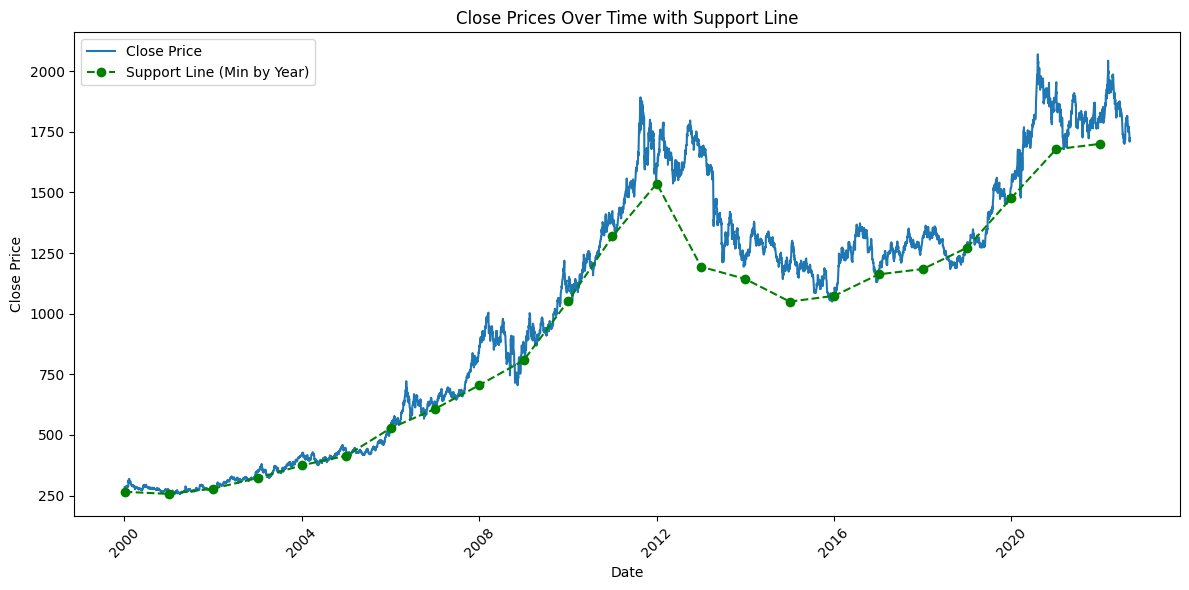

In [52]:
plot_df = df.sort_values('date').copy()
plot_df['date'] = pd.to_datetime(plot_df['date'])

# Основной график
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='close', data=plot_df, label='Close Price')

# Группируем по году (или месяцу) и берём минимум
plot_df['year'] = plot_df['date'].dt.year
support_points = plot_df.groupby('year').agg({'date':'first', 'close':'min'}).reset_index()

# Линия поддержки (support line)
plt.plot(support_points['date'], support_points['close'], color='green', linestyle='--', marker='o', label='Support Line (Min by Year)')

plt.title('Close Prices Over Time with Support Line')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Из графика следует, что цена на золото росла с 2000 по 2012 год и с 2020 года по настоящее время. В то же время как цена на золото падала с 2012 по 2016 годы. Тренд - восходящий.

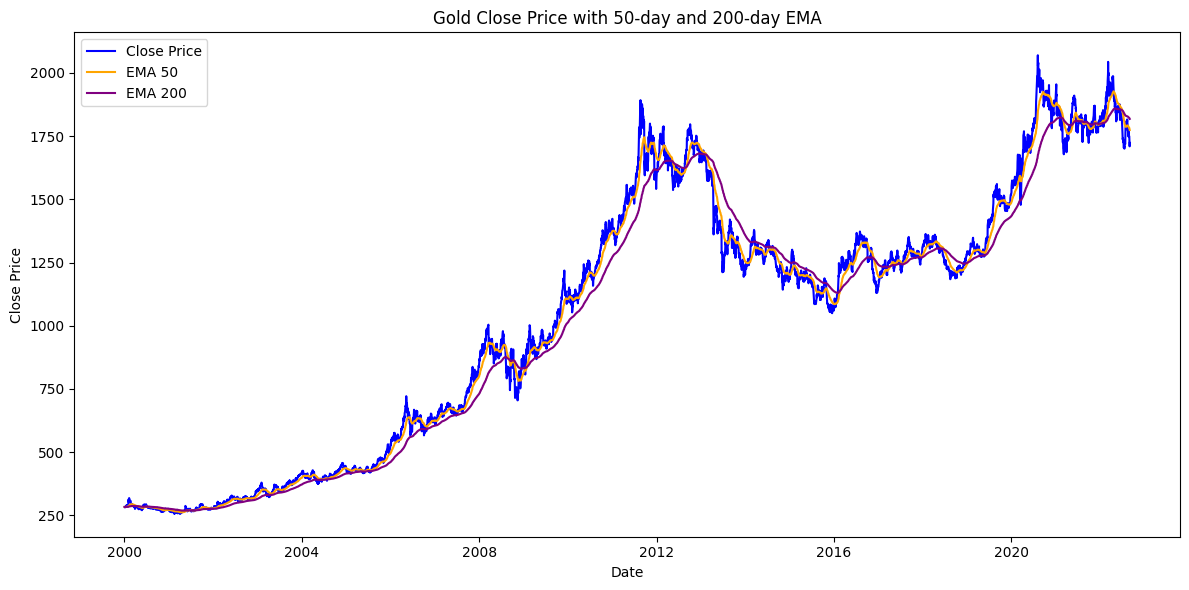

In [53]:
# Если дата не в формате datetime, преобразуем
df['date'] = pd.to_datetime(df['date'])

# Сортируем по дате для корректного отображения
df = df.sort_values('date')

# Считаем экспоненциальные скользящие средние
df['EMA50'] = df['close'].ewm(span=50, adjust=False).mean()
df['EMA200'] = df['close'].ewm(span=200, adjust=False).mean()

# Строим график
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['EMA50'], label='EMA 50', color='orange')
plt.plot(df['date'], df['EMA200'], label='EMA 200', color='purple')
plt.title('Gold Close Price with 50-day and 200-day EMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

Судя по данным, начиная с 2020 года, пересечение EMA50 и EMA200 образует фигуру теханализа "крест смерти", которая служит одним из сигналов на продажу.

# **Промежуточные выводы к исследовательскому анализу данных**

- Минимальной ценой закрытия стало 256.6 USD,  дата 02.04.2001 00:00:00
- Максимальной ценой закрытия стало 2069.4 USD, дата 06.08.2020 00:00:00

- Средняя цена закрытия упала на первом году торгов, но затем начала возрастать до 2012 года включительно.

- Годом с максимальным объёмом стал 2019, кол-во сделок -  77026754.

-Разные инструменты теханализа показывают разные сигналы: трендовая линия говорит о том, что золото можно брать, а пересечение EMA50 и EMA200 утверждает обратное.
